### 이미지 매끄럽게 하기 Smoothing Images
Learn to convert images to binary images using global thresholding, Adaptive thresholding, Otsu’s binarization et

#### 목표
Learn to:
* Blur the images with various low pass filters
* Apply custom-made filters to images (2D convolution)

#### 2D 컨볼 루션 (이미지 필터링)
1 차원 신호 에서처럼 다양한 저역 통과 필터 (LPF), 고역 필터 (HPF) 등으로 이미지를 필터링 할 수도 있습니다. LPF는 노이즈 제거, 이미지 흐리게 처리 등에 도움이됩니다. HPF 필터는 이미지.

OpenCV는 이미지로 커널을 컨볼 루션 하는 함수 cv2.filter2D () 를 제공합니다 . 예를 들어 이미지에 대한 평균화 필터를 시도해 보겠습니다. 5x5 평균 필터 커널은 다음과 같습니다.

![](k_matrix.png)

작동은 다음과 같습니다 :이 커널을 픽셀 이상으로 유지하고이 커널 아래 25 픽셀 모두를 추가하고 평균을 취하여 중앙 픽셀을 새로운 평균값으로 대체하십시오. 이미지의 모든 픽셀에 대해이 작업을 계속합니다. 이 코드를 시험해보고 결과를 확인하십시오 :

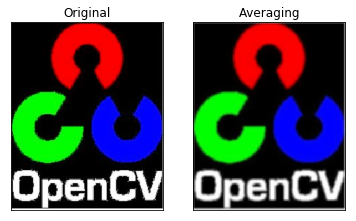

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

img = cv2.imread('opencv_logo.png')

kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(img, -3, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#### 이미지 흐리게 처리 Image Blurring (Image Smoothing
이미지 블러 링은 로우 패스 필터 커널로 이미지를 컨벌루션함으로써 달성됩니다. 소음을 제거 할 때 유용합니다. 실제로 이미지에서 고주파수 콘텐츠 (예 : 노이즈, 가장자리)가 제거됩니다. 따라서 이 작업에서는 가장자리가 조금 흐려집니다. (글쎄, 모서리를 흐리게하지 않는 흐림 기법이 있습니다.) OpenCV는 주로 네 가지 유형의 흐림 기술을 제공합니다.


##### 1. 평균화
이는 정규화 된 상자 필터로 이미지를 컨벌루션하여 수행됩니다. 단순히 커널 영역 아래의 모든 픽셀의 평균을 취하고 중심 요소를 대체합니다. 이것은 cv2.blur () 또는 cv2.boxFilter () 함수에 의해 수행됩니다 . 커널에 대한 자세한 내용은 문서를 확인하십시오. 우리는 커널의 너비와 높이를 지정해야합니다. 3x3 정규화 된 상자 필터는 다음과 같습니다.
![](averaging_matrix.png)
**노트** 정규화 된 상자 필터를 사용하지 않으려면 cv2.boxFilter ()를 사용 하십시오 . 인수 normalize = False 를 함수에 전달합니다.

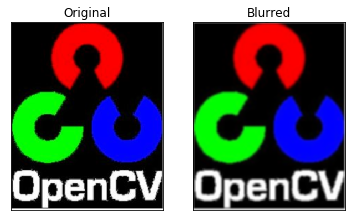

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv_logo.png')

blur = cv2.blur(img, (5, 5))

plt.subplot(121), plt.imshow(img),  plt.title('Original')
plt.xticks([])  , plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([])  , plt.yticks([])
plt.show()

##### 2. 가우시안 블러링
여기서 상자 필터 대신 가우시안 커널이 사용됩니다. 함수 **cv2.GaussianBlur ()로 끝난다** . 우리는 양수와 홀수이어야하는 커널의 너비와 높이를 지정해야합니다. X와 Y 방향의 표준 편차 sigmaX와 sigmaY를 각각 지정해야합니다. sigmaX 만 지정하면 sigmaY는 sigmaX와 같게됩니다. 둘 다 0으로 주어지면 커널 크기로부터 계산됩니다. 가우시안 블러 링은 이미지에서 가우스 노이즈를 제거하는 데 매우 효과적입니다.

원하는 경우 *cv2.getGaussianKernel()* 함수를 사용하여 가우스 커널을 만들 수 있습니다 .

위의 코드는 가우시안 블러 링을 위해 수정할 수 있습니다.


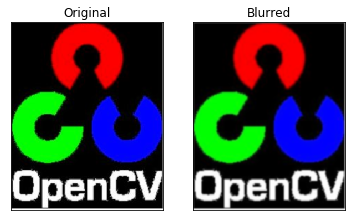

In [19]:
img = cv2.imread('opencv_logo.png')
blur = cv2.GaussianBlur(img,(5, 5), 0)

plt.subplot(121), plt.imshow(img),  plt.title('Original')
plt.xticks([])  , plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([])  , plt.yticks([])
plt.show()

##### 3. Median Blurring

여기서 함수 cv2.medianBlur () 는 커널 영역 아래의 모든 픽셀의 중앙값을 취하고 중심 요소는이 중간 값으로 대체됩니다. 이것은 이미지의 소금과 후추 노이즈에 매우 효과적입니다. 흥미로운 점은 위의 필터에서 중심 요소는 새로 계산 된 값으로 이미지의 픽셀 값 또는 새 값일 수 있습니다. 그러나 중간 흐리게 처리에서 중심 요소는 항상 이미지의 일부 픽셀 값으로 대체됩니다. 효과적으로 소음을 줄입니다. 커널 크기는 양의 홀수 여야합니다.

이 데모에서는 원본 이미지에 50 %의 노이즈를 추가하고 중간 흐림 효과를 적용했습니다. 결과 확인 :

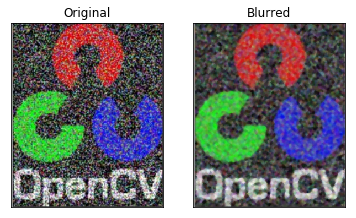

In [26]:
img = cv2.imread('opencv_logo_noisy.png')

blur = cv2.medianBlur(img, 5)

plt.subplot(121), plt.imshow(img),  plt.title('Original')
plt.xticks([])  , plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([])  , plt.yticks([])
plt.show()

##### 양방향 필터링

**cv2.bilateralFilter ()** 는 가장자리를 선명하게 유지하면서 노이즈 제거에 매우 효과적입니다. 그러나 다른 필터에 비해 작동 속도가 느립니다. 우리는 이미 가우시안 필터가 픽셀 주변의 이웃을 취하여 그 가우스 가중 평균을 발견하는 것을 보았습니다. 이 가우스 필터는 공간 만의 함수입니다. 즉, 필터링하는 동안 주변 픽셀을 고려합니다. 픽셀의 강도가 거의 같은지 여부는 고려하지 않습니다. 픽셀이 에지 픽셀인지 여부는 고려하지 않습니다. 그래서 우리가하고 싶지 않은 가장자리도 흐리게 만듭니다.

양자 필터는 또한 공간에서 가우시안 필터를 취하지만 픽셀 차이의 함수 인 가우시안 필터를 하나 더 사용합니다. 공간의 가우스 함수는 주변 픽셀 만 블러 링을 고려하고 강도 차이의 가우시안 함수는 중심 픽셀과 비슷한 강도를 갖는 픽셀 만 흐리게 처리하도록합니다. 그래서 가장자리의 픽셀은 큰 강도 변화를 가질 것이기 때문에 가장자리를 보존합니다.

아래 샘플은 양방향 필터 사용을 보여줍니다 (인수에 대한 자세한 내용은 docs를 방문하십시오).

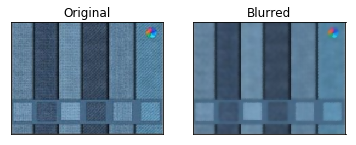

In [28]:
img = cv2.imread('bilateral_img.png')
blur = cv2.bilateralFilter(img, 9, 75, 75)

plt.subplot(121), plt.imshow(img),  plt.title('Original')
plt.xticks([])  , plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([])  , plt.yticks([])
plt.show()